## Data Analysis(Data Exploration)
**Import Libraries:**

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load and Read File:**

In [207]:
data =pd.read_csv("House Pricing.csv") 

**Check for Dirty Data:**

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Cleaning Data:**

In [209]:
data.dropna(inplace=True) #Drop Rows that have NA value

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

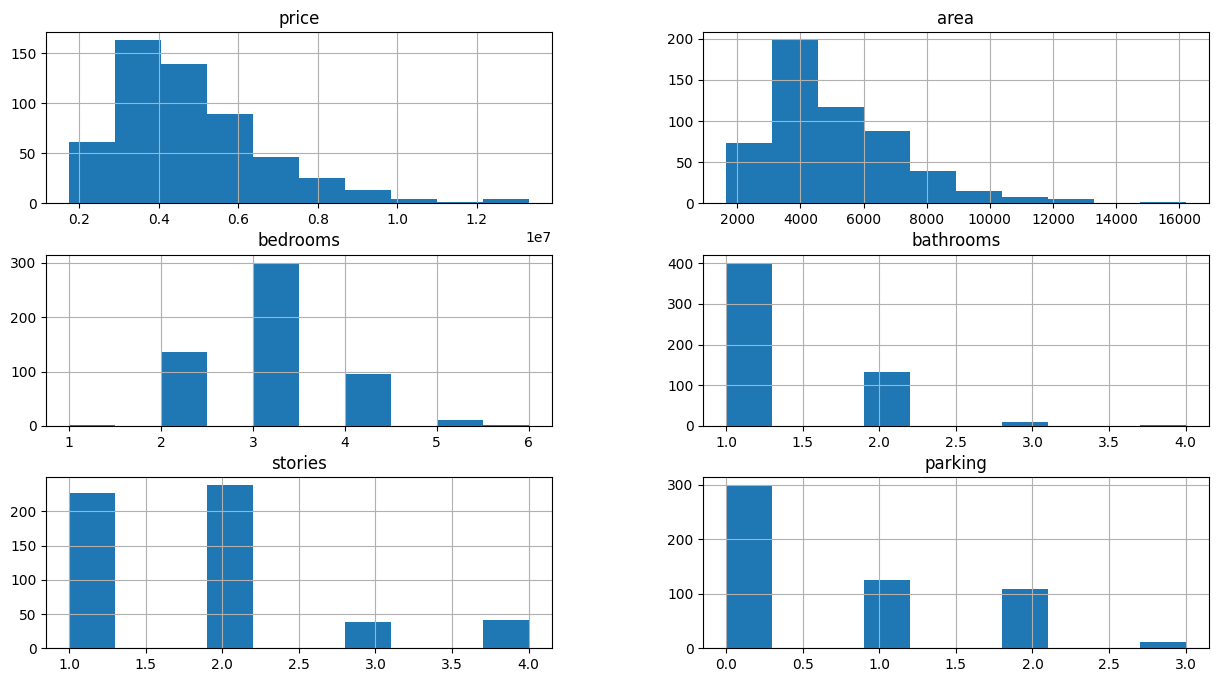

In [210]:
data.hist(figsize=(15,8)) #Histogram of various features

<Axes: >

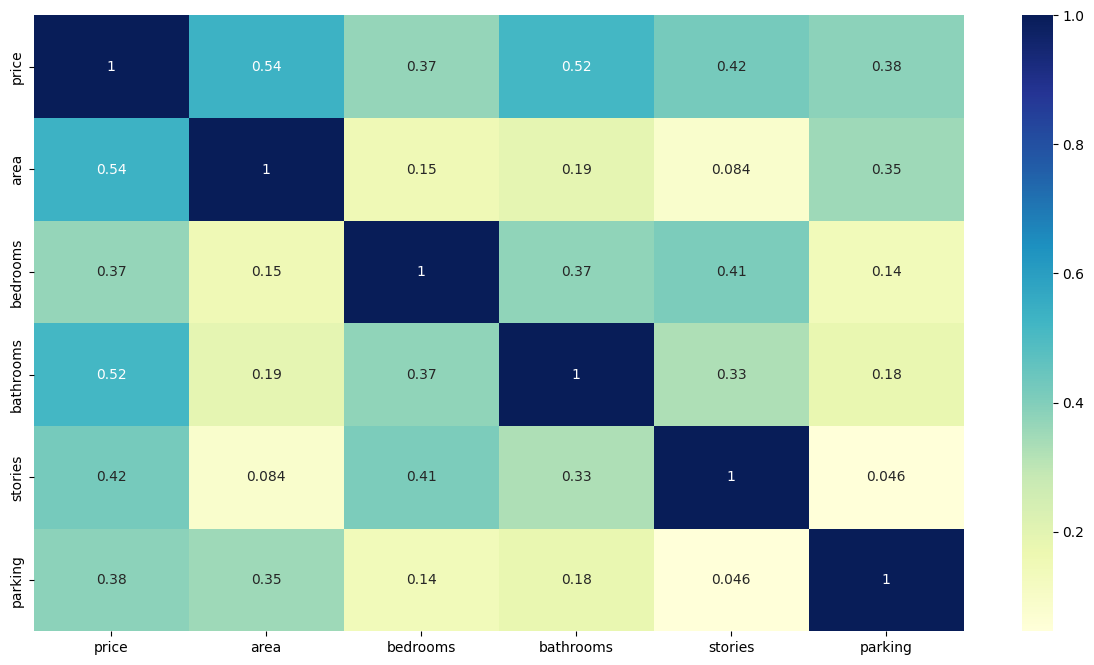

In [211]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only = True),annot=True,cmap="YlGnBu")
#Allow us to see the correlation between different features,the higher the
#stronger is the correllation betweenn 2 features.

## Data Proprocessing

**Split the Test Data into x (Features) and y (Output)**

In [212]:
from sklearn.model_selection import train_test_split

x=data.drop(['price'],axis=1) #drop 1 column so axis=1
y=data['price']


In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [214]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
468,2835,2,1,1,yes,no,no,no,no,0,no,semi-furnished
237,5010,3,1,2,yes,no,yes,no,no,0,no,semi-furnished
37,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
436,2145,3,1,2,yes,no,yes,no,no,0,yes,furnished
331,7260,3,2,1,yes,yes,yes,no,no,3,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
455,5495,3,1,1,yes,no,yes,no,no,0,no,unfurnished
108,3240,4,1,3,yes,no,no,no,no,1,no,semi-furnished
347,3350,3,1,2,yes,no,no,no,no,0,no,unfurnished
182,3410,3,1,2,no,no,no,no,yes,0,no,semi-furnished


In [215]:
train_data=x_train.join(y_train) #Join back

**Convert the data which are not numerical data(Yes/No or other categorical data) by creating new features and simply apply 0/1 to it,and last drop the column out of the train_data**

In [216]:
train_data.furnishingstatus.value_counts()  #shows how many categorical data are in this feature（column)

furnishingstatus
semi-furnished    177
unfurnished       150
furnished         109
Name: count, dtype: int64

In [217]:
train_data=train_data.join(pd.get_dummies(train_data.furnishingstatus,dtype=int)).drop(['furnishingstatus'],axis=1)

In [218]:
train_data.replace(('yes', 'no'), (1, 0), inplace=True)

In [219]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
399,7350,2,1,1,1,0,0,0,0,1,0,3500000,0,1,0
449,1650,3,1,2,0,0,1,0,0,0,0,3150000,0,0,1
412,2610,3,1,2,1,0,1,0,0,0,1,3430000,0,0,1
325,3460,4,1,2,1,0,0,0,1,0,0,4007500,0,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,12250000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3185,2,1,1,1,0,0,0,0,2,0,3430000,0,0,1
326,4100,4,1,1,0,0,1,0,0,0,0,3990000,0,0,1
405,3060,3,1,1,1,0,0,0,0,0,0,3465000,0,0,1
406,5320,2,1,1,1,0,0,0,0,1,1,3465000,0,0,1


<Axes: >

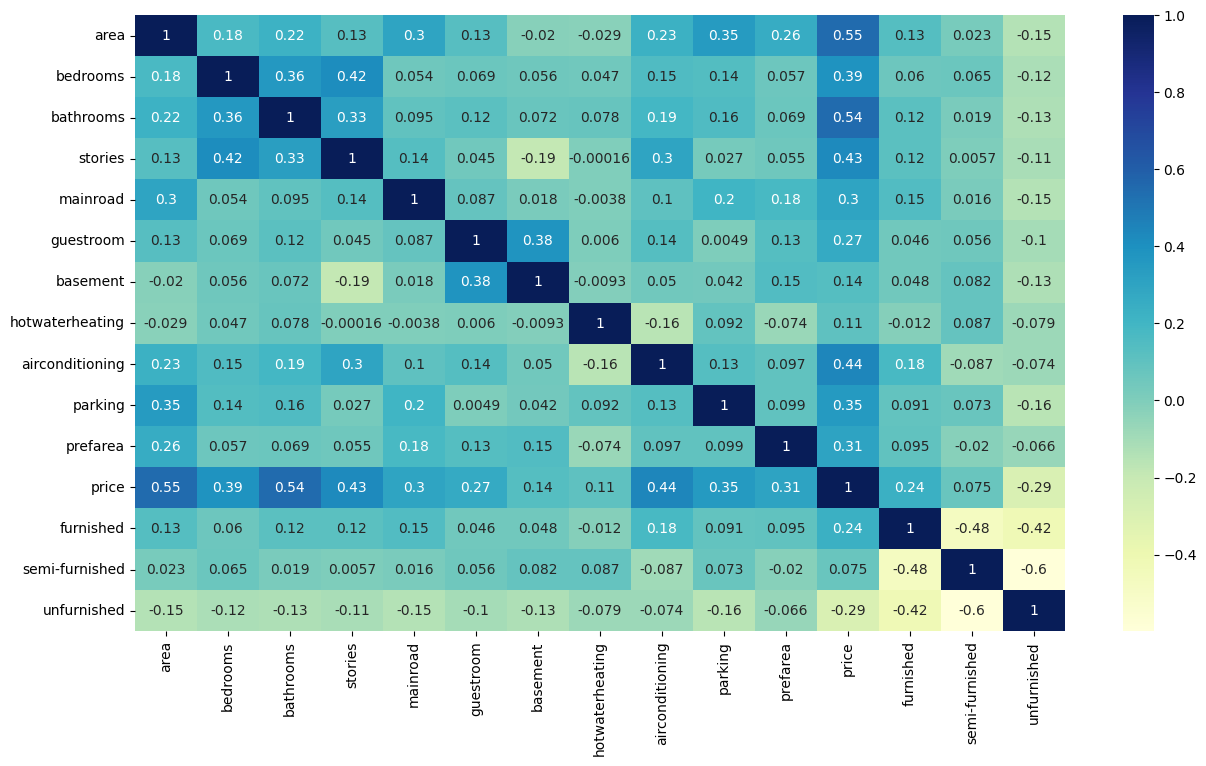

In [220]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only = True),annot=True,cmap="YlGnBu")
#Show the correlation after converting everything into numerical data

## Regression Model Development

**Linear Regression**

In [221]:
from sklearn.linear_model import LinearRegression

x_train,y_train=train_data.drop(['price'],axis=1),train_data['price']

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [222]:
test_data=x_test.join(y_test)

test_data=test_data.join(pd.get_dummies(test_data.furnishingstatus,dtype=int)).drop(['furnishingstatus'],axis=1)
test_data.replace(('yes', 'no'), (1, 0), inplace=True)


In [223]:
x_test,y_test=test_data.drop(['price'],axis=1),test_data['price']

In [224]:
reg.score(x_test,y_test)

0.6457082273211547

In [225]:
#The higher the R-squared score, the better the model fits the test data.

**Logistic Regression**

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix


# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['furnishingstatus'], dtype=int)
data.replace(('yes', 'no'), (1, 0), inplace=True)

# Create binary target variable based on median price
price_threshold = data['price'].median()
data['is_expensive'] = np.where(data['price'] > price_threshold, 1, 0)

In [227]:
# Split data into training and test sets
x = data.drop(['price', 'is_expensive'], axis=1)
y = data['is_expensive']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [228]:
# Train the logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [229]:
# Make predictions and evaluate the model
y_pred = lr.predict(x_test)

In [230]:
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
accuracy = accuracy_score(y_test, y_pred) #to calculate the accuracy score
report = classification_report(y_test, y_pred) # To create classification report
cm = confusion_matrix(y_test, y_pred) # To create confusion matrix

## Model Evaluation

**Experiment with Selecting The Top 5 Most Important Features(Linear Regression)**

In [231]:
from sklearn.feature_selection import SelectKBest, f_regression

data = pd.read_csv("House Pricing.csv") 

# Preprocess data
data.dropna(inplace=True)
data = data.join(pd.get_dummies(data.furnishingstatus, dtype=int)).drop(['furnishingstatus'], axis=1)
data.replace(('yes', 'no'), (1, 0), inplace=True)

In [232]:
# Split data into training and test sets
x = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [233]:
# Apply feature selection to training set
selector = SelectKBest(f_regression, k=5)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

In [234]:
# Train a linear regression model using the selected features
reg_k = LinearRegression()
reg_k.fit(x_train_selected, y_train)
score = reg_k.score(x_test_selected, y_test)
print(f"R-squared score using top 5 features: {score}")

R-squared score using top 5 features: 0.6118674045957178


**Experiment with Grid Search to Find the Best Hyperparameter(Logistic Regression)**

In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("House Pricing.csv")  

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['furnishingstatus'], dtype=int)
data.replace(('yes', 'no'), (1, 0), inplace=True)

In [236]:
# Create binary target variable based on median price
price_threshold = data['price'].median()
data['is_expensive'] = np.where(data['price'] > price_threshold, 1, 0)

In [237]:
# Split data into training and test sets
x = data.drop(['price', 'is_expensive'], axis=1)
y = data['is_expensive']
x_train, x_test_R, y_train, y_test_R = train_test_split(x, y, test_size=0.2)
# Define the hyperparameters to explore
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10],
                   'solver': ['liblinear', 'saga']}

In [238]:
# Create a logistic regression model
lr = LogisticRegression(max_iter=1000)

In [239]:
# Use grid search to find the optimal hyperparameters
grid_search = GridSearchCV(lr, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

C:\Users\natsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\natsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [240]:
# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8187565308254964


### Linear Regression Model:

**Scatter Plot**

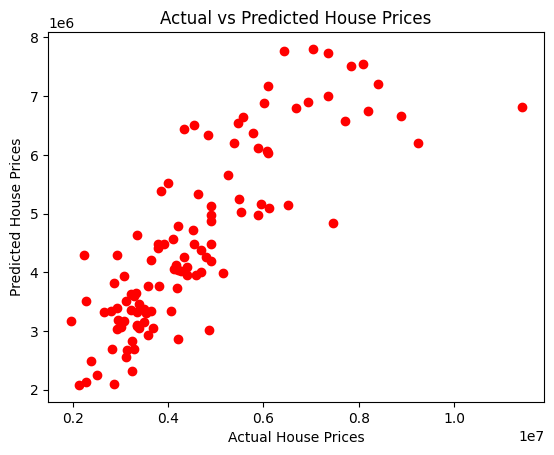

In [241]:
predicted_prices = reg.predict(x_test)
plt.scatter(y_test, predicted_prices,c="r")
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()
# The closer the points are to the diagonal line, the more accurate the predictions are.

**Distribution Plot**

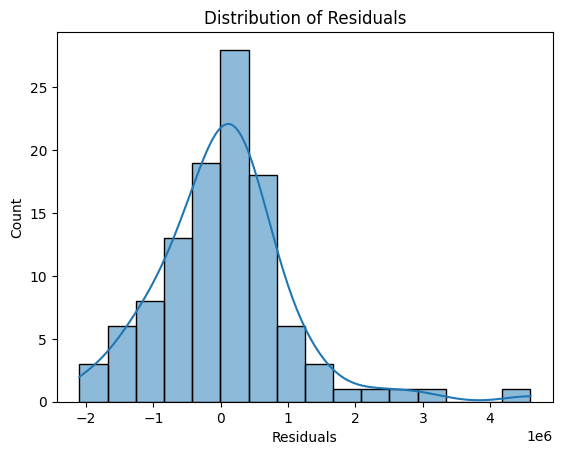

In [242]:
residuals = y_test - predicted_prices
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [243]:
#Residuals are the differences between the actual values of the target variable
#If the residuals are small (i.e., close to zero), it indicates that the model is accurately predicting the target variable
#Distribution of the residuals should be approximately normal, centered around zero, and with a constant variance.

### Logistic Regression Model:

**Accuracy & Classification Report**

In [244]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8623853211009175
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        58
           1       0.89      0.80      0.85        51

    accuracy                           0.86       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.86      0.86      0.86       109



**Confusion Matrix**

In [245]:
print(f"Confusion Matrix:\n{cm}\n")

Confusion Matrix:
[[53  5]
 [10 41]]



In [ ]:
# The rows and columns representing the actual and predicted classifications, respectively. The diagonal of the matrix represents the correct predictions, while the off-diagonal elements represent the incorrect predictions.